Dataset Information
ค้นหา Data จาก Kaggle https://www.kaggle.com/datasets/leomartinelli/bullying-in-schools รายละเอียดของข้อมูล ประกอบไปด้วย
File name: school_bully1.csv

This file has the following attributes
-Bullied on school property in past 12 months,
-Bullied not on school property in past 12_months
-Cyber bullied in past 12 months
-Custom Age
-Sex
-Physically attacked
-Physical fighting
-Felt lonely
-Close friends
-Miss school no permission
-Other students kind and helpful
-Parents understand problems
-Most of the time or always felt lonely
-Missed classes or school without permission
-Were underweight
-Were overweight
-Were obese

1. Import Libraly and Data

In [815]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [816]:
df = pd.read_csv("school_bully1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [817]:
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


2. Cleansing Data

In [818]:
df = df.drop( columns=['Were_obese'] )
df = df.drop( columns=['Missed_classes_or_school_without_permission'] )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [819]:
df.rename(columns = {'Bullied_on_school_property_in_past_12_months':'Bullied_on_school','Bullied_not_on_school_property_in_past_12_months':'Bullied_not_on_school', 
   'Cyber_bullied_in_past_12_months':'Cyber_bullied','Miss_school_no_permission':'Miss_school'}, inplace = True)
print(df.columns)

Index(['record', 'Bullied_on_school', 'Bullied_not_on_school', 'Cyber_bullied',
       'Custom_Age', 'Sex', 'Physically_attacked', 'Physical_fighting',
       'Felt_lonely', 'Close_friends', 'Miss_school',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely', 'Were_underweight',
       'Were_overweight'],
      dtype='object')


In [820]:
df['Custom_Age'] = df['Custom_Age'].str.replace('years old', '').str.replace('or younger', '').str.replace('or older', '')
df['Close_friends'] = df['Close_friends'].str.replace(' or more', '')

#for index, row in df.iterrows():
    # days = row['Miss_school']
    # if days == '10 or more days':
    #     df.at[index, 'Miss_school'] = 10
    # elif days == '6 to 9 days':
    #     df.at[index, 'Miss_school'] = 7.5
    # elif days == '3 to 5 days':
    #     df.at[index, 'Miss_school'] = 7.5
    # elif days == '1 or 2 days':
    #     df.at[index, 'Miss_school'] = 1.5
    # elif days == '0 days':
    #     df.at[index, 'Miss_school'] = 0
df.head()

,record,Bullied_on_school,Bullied_not_on_school,Cyber_bullied,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Were_underweight,Were_overweight
0,1,Yes,Yes,,13,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,,
1,2,No,No,No,13,Female,0 times,0 times,Never,3,0 days,Sometimes,Always,No,,
2,3,No,No,No,14,Male,0 times,0 times,Never,3,0 days,Sometimes,Always,No,No,No
3,4,No,No,No,16,Male,0 times,2 or 3 times,Never,3,0 days,Sometimes,,No,No,No
4,5,No,No,No,13,Female,0 times,0 times,Rarely,3,0 days,Most of the time,Most of the time,No,,


In [821]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.head()

,record,Bullied_on_school,Bullied_not_on_school,Cyber_bullied,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Were_underweight,Were_overweight
0,1,Yes,Yes,NaN,13,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,NaN,NaN
1,2,No,No,No,13,Female,0 times,0 times,Never,3,0 days,Sometimes,Always,No,NaN,NaN
2,3,No,No,No,14,Male,0 times,0 times,Never,3,0 days,Sometimes,Always,No,No,No
3,4,No,No,No,16,Male,0 times,2 or 3 times,Never,3,0 days,Sometimes,NaN,No,No,No
4,5,No,No,No,13,Female,0 times,0 times,Rarely,3,0 days,Most of the time,Most of the time,No,NaN,NaN


3.DATA ANALYSIS (GROUP, TRANSFORM, PLOT)

In [822]:
on_school_counts = df['Bullied_on_school'].value_counts()
print(on_school_counts)

No     43839
Yes    11903
Name: Bullied_on_school, dtype: int64


In [823]:
not_on_school_counts = df['Bullied_not_on_school'].value_counts()
print(not_on_school_counts)

No     44263
Yes    12229
Name: Bullied_not_on_school, dtype: int64


In [824]:
Cyber_counts = df['Cyber_bullied'].value_counts()
print(Cyber_counts)

No     44213
Yes    12197
Name: Cyber_bullied, dtype: int64


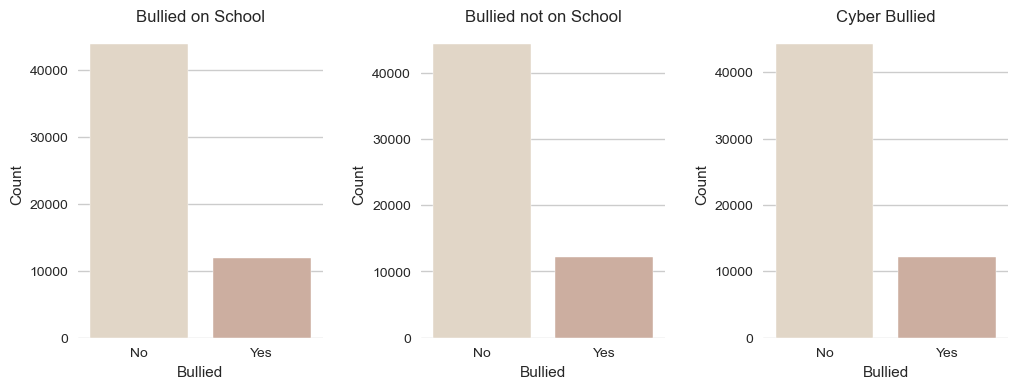

In [825]:
#ดูสัดส่วนของเด็กที่โดนบูลลี่ทั้งในโรงเรียน นอกโรงเรียน และ  cyberbully
# Get the value counts for each plot
on_school_counts = df['Bullied_on_school'].value_counts()
not_on_school_counts = df['Bullied_not_on_school'].value_counts()
cyber_bullied_counts = df['Cyber_bullied'].value_counts()

# Set the Seaborn palette
sns.set_palette("ch:.25")

# Create the figure and subplots
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

# Create the first bar plot
sns.barplot(x=on_school_counts.index, y=on_school_counts.values, ax=axes[0])
axes[0].set_title('Bullied on School')
axes[0].set_xlabel('Bullied')
axes[0].set_ylabel('Count')

# Create the second bar plot
sns.barplot(x=not_on_school_counts.index, y=not_on_school_counts.values, ax=axes[1])
axes[1].set_title('Bullied not on School')
axes[1].set_xlabel('Bullied')
axes[1].set_ylabel('Count')

# Create the third bar plot
sns.barplot(x=cyber_bullied_counts.index, y=cyber_bullied_counts.values, ax=axes[2])
axes[2].set_title('Cyber Bullied')
axes[2].set_xlabel('Bullied')
axes[2].set_ylabel('Count')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

Q1.เด็กที่โดนแกล้งในโรงเรียนส่วนใหญ่เป็นเพศอะไร และ อายุเท่าไหร่

In [826]:
filtered_df3 = df[(df['Bullied_on_school'] == 'Yes')][['Sex']].value_counts()
display(pd.DataFrame(filtered_df3))
#print(filtered_df3 )

,0
Sex,
Female,6761
Male,5007


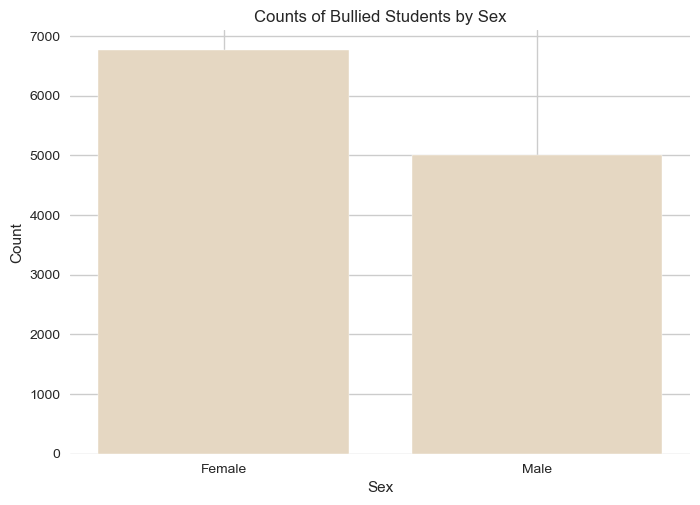

In [827]:

filtered_df3 = df[(df['Bullied_on_school'] == 'Yes')][['Sex']].value_counts().reset_index(name='count')

# Create a bar plot of the counts by sex
plt.bar(filtered_df3['Sex'], filtered_df3['count'])

# Add labels and title to the plot
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Bullied Students by Sex')

# Display the plot
plt.show()


In [828]:
df2=df.dropna(subset='Custom_Age')
df2['Custom_Age']=df2['Custom_Age'].astype('Int64')

C:\Users\Windows\AppData\Local\Temp\ipykernel_8756\537472604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Custom_Age']=df2['Custom_Age'].astype('Int64')


In [829]:
display(df2)

,record,Bullied_on_school,Bullied_not_on_school,Cyber_bullied,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Were_underweight,Were_overweight
0,1,Yes,Yes,NaN,13,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,NaN,NaN
1,2,No,No,No,13,Female,0 times,0 times,Never,3,0 days,Sometimes,Always,No,NaN,NaN
2,3,No,No,No,14,Male,0 times,0 times,Never,3,0 days,Sometimes,Always,No,No,No
3,4,No,No,No,16,Male,0 times,2 or 3 times,Never,3,0 days,Sometimes,NaN,No,No,No
4,5,No,No,No,13,Female,0 times,0 times,Rarely,3,0 days,Most of the time,Most of the time,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56976,57091,No,Yes,No,16,Male,0 times,4 or 5 times,Sometimes,3,0 days,Sometimes,Sometimes,No,No,Yes
56977,57092,No,No,No,16,Male,0 times,0 times,Rarely,1,0 days,Sometimes,Never,No,NaN,NaN
56978,57093,No,No,No,16,Male,0 times,0 times,Sometimes,3,0 days,Rarely,Sometimes,No,NaN,NaN
56979,57094,No,Yes,No,16,Female,0 times,0 times,Sometimes,2,0 days,Most of the time,Rarely,No,NaN,NaN


In [830]:
bully_age = df2.groupby(['Sex', 'Bullied_on_school']).agg({'Custom_Age': 'mean'})

display(bully_age)

Custom_Age
Sex    Bullied_on_school            
Female No                  14.928097
       Yes                 14.794166
Male   No                  14.955129
       Yes                 14.772491

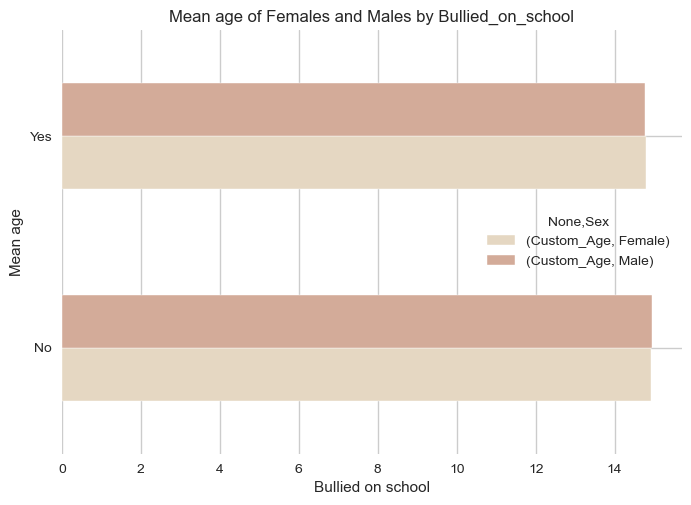

In [831]:
bully_age = df2.groupby(['Sex', 'Bullied_on_school']).agg({'Custom_Age': 'mean'})

# Create a bar chart with separate bars for "Female" and "Male"
bully_age.unstack('Sex').plot(kind='barh')

# Set the axis labels and title
plt.xlabel('Bullied on school')
plt.ylabel('Mean age')
plt.title('Mean age of Females and Males by Bullied_on_school')

# Display the plot
plt.show()

Answer Q1

เด็กที่โดนกลั่นแกล้งในโรงเรียน เป็นเพศหญิง 6761 คน และ เป็นเพศชาย 5007 คน 
อายุเฉลี่ยนของเพศหญิงที่โดนกลั่นแกล้งคือ 14.794166 และที่ไม่โดนกลั่นแกล้งคือ 14.928097
อายุเฉลี่ยนของเพศชายที่โดนกลั่นแกล้งคือ 14.772491 และที่ไม่โดนกลั่นแกล้งคือ 14.955129

Q2.เด็กที่โดนแกล้งในโรงเรียน ส่วนใหญ่เป็นเด็กที่มีลักษณะอ้วนหรือผอม


In [832]:
filtered_df2 = df[(df['Bullied_on_school'] == 'Yes')] [['Were_underweight', 'Were_overweight']]


In [833]:
underweight2_counts = filtered_df2['Were_underweight'].value_counts()
display(pd.DataFrame(underweight2_counts))

,Were_underweight
No,7301
Yes,171


In [834]:
overweight2_counts = filtered_df2['Were_overweight'].value_counts()
display(pd.DataFrame(overweight2_counts))

,Were_overweight
No,5113
Yes,2359


Answer Q2

จากข้อมูลยพบว่า เด็กที่มีรูปร่างอ้วนโดนกลั่นแกล้งเยอะกว่าเด็กที่มีรูปร่างผอม

Q3 .ถ้าในโรงเรียนเด็กอ้วนโดนกลั่นแกล้งเยอะสุดแล้ว ถ้าจากหลายๆที่จะยังเป็นเด็กที่อ้วนอยู่ไหม

In [835]:
# Filter the rows that contain "yes" in all three columns and include column4 in the result
get_all_bully = df[(df['Bullied_on_school'] == 'Yes') & (df['Bullied_not_on_school'] == 'Yes') & (df['Cyber_bullied'] == 'Yes')]

# Display the filtered DataFrame
print(get_all_bully)



       record Bullied_on_school Bullied_not_on_school Cyber_bullied  \
11         12               Yes                   Yes           Yes   
18         19               Yes                   Yes           Yes   
32         33               Yes                   Yes           Yes   
40         41               Yes                   Yes           Yes   
55         56               Yes                   Yes           Yes   
...       ...               ...                   ...           ...   
56840   56955               Yes                   Yes           Yes   
56843   56958               Yes                   Yes           Yes   
56890   57005               Yes                   Yes           Yes   
56909   57024               Yes                   Yes           Yes   
56955   57070               Yes                   Yes           Yes   

      Custom_Age     Sex Physically_attacked Physical_fighting  \
11           13   Female    12 or more times            1 time   
18           14

In [836]:
filtered_df = df[(df['Bullied_on_school'] == 'Yes') & (df['Bullied_not_on_school'] == 'Yes') & (df['Cyber_bullied'] == 'Yes')][['Were_underweight', 'Were_overweight']]

# Display the filtered DataFrame
display(pd.DataFrame(filtered_df))

,Were_underweight,Were_overweight
11,NaN,NaN
18,NaN,NaN
32,No,No
40,No,Yes
55,NaN,NaN
...,...,...
56840,No,No
56843,NaN,NaN
56890,No,Yes
56909,NaN,NaN


In [837]:
underweight_counts = filtered_df['Were_underweight'].value_counts()
display(pd.DataFrame(underweight_counts))

,Were_underweight
No,2346
Yes,50


In [838]:
overweight_counts = filtered_df['Were_overweight'].value_counts()
display(pd.DataFrame(overweight_counts))

,Were_overweight
No,1651
Yes,745


In [839]:
#แล้วส่วนใหญ่เป็นเพศอะไร
allbully_sex = df[(df['Bullied_on_school'] == 'Yes') & (df['Bullied_not_on_school'] == 'Yes') & (df['Cyber_bullied'] == 'Yes')& (df['Were_overweight'] == 'Yes')][['Sex']].value_counts()
display(pd.DataFrame(allbully_sex))


,0
Sex,
Female,449
Male,296


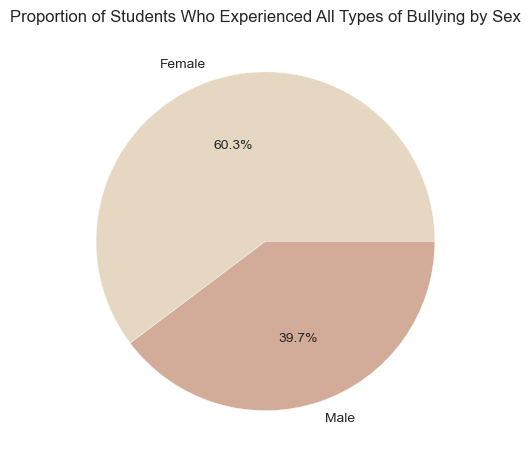

In [840]:
allbully_sex = df[(df['Bullied_on_school'] == 'Yes') & 
                  (df['Bullied_not_on_school'] == 'Yes') & 
                  (df['Cyber_bullied'] == 'Yes') & 
                  (df['Were_overweight'] == 'Yes')][['Sex']].value_counts().reset_index(name='count')

# Create a pie chart of the counts by sex
plt.pie(allbully_sex['count'], labels=allbully_sex['Sex'], autopct='%1.1f%%')

# Add a title to the plot
plt.title('Proportion of Students Who Experienced All Types of Bullying by Sex')

# Display the plot
plt.show()

แล้วส่วนใหญ่เป็นอายุเท่าไหร่อะไร

In [841]:
#เพศหญิง
allbully_sex_f = df[(df['Bullied_on_school'] == 'Yes') & (df['Bullied_not_on_school'] == 'Yes') & (df['Cyber_bullied'] == 'Yes')& (df['Were_overweight'] == 'Yes') & (df['Sex'] == 'Female')][['Custom_Age']].value_counts()
display(pd.DataFrame(allbully_sex_f))

,0
Custom_Age,
15,107
14,101
13,88
16,86
17,63
12,3
18,1


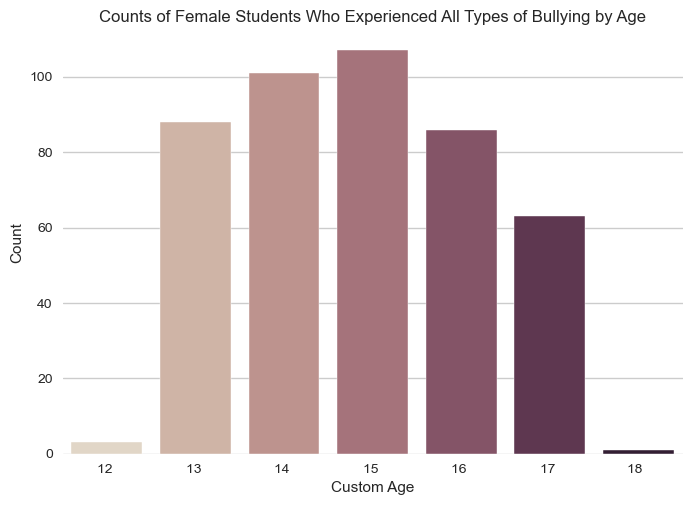

In [842]:
allbully_sex_f = df[(df['Bullied_on_school'] == 'Yes') & 
                    (df['Bullied_not_on_school'] == 'Yes') & 
                    (df['Cyber_bullied'] == 'Yes') & 
                    (df['Were_overweight'] == 'Yes') & 
                    (df['Sex'] == 'Female')][['Custom_Age']].value_counts().reset_index(name='count')

# Sort the dataframe by Custom_Age
allbully_sex_f = allbully_sex_f.sort_values('Custom_Age')

# Create a bar plot of the counts by Custom_Age with "ch:.25" color palette
sns.barplot(x='Custom_Age', y='count', data=allbully_sex_f, palette="ch:.25")

# Add labels and title to the plot
plt.xlabel('Custom Age')
plt.ylabel('Count')
plt.title('Counts of Female Students Who Experienced All Types of Bullying by Age')

# Display the plot
plt.show()

In [843]:
allbully_sex_m = df[(df['Bullied_on_school'] == 'Yes') & (df['Bullied_not_on_school'] == 'Yes') & (df['Cyber_bullied'] == 'Yes')& (df['Were_overweight'] == 'Yes') & (df['Sex'] == 'Male')][['Custom_Age']].value_counts()
display(pd.DataFrame(allbully_sex_m))

,0
Custom_Age,
16,70
14,69
15,67
13,51
17,36
18,2
12,1


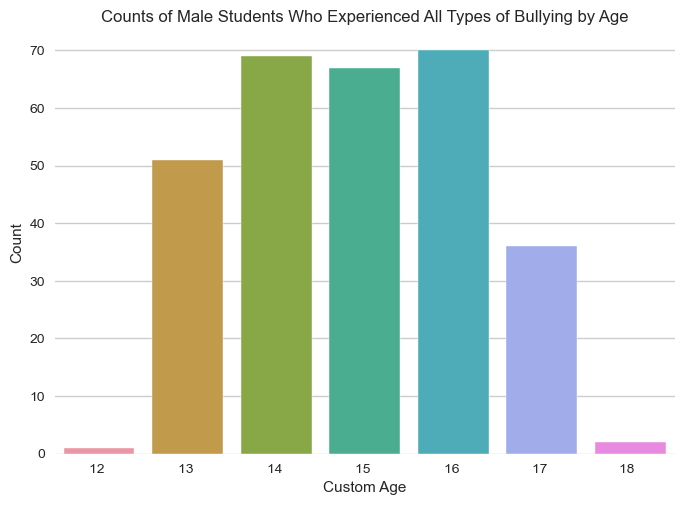

In [844]:
allbully_sex_m = df[(df['Bullied_on_school'] == 'Yes') & 
                    (df['Bullied_not_on_school'] == 'Yes') & 
                    (df['Cyber_bullied'] == 'Yes') & 
                    (df['Were_overweight'] == 'Yes') & 
                    (df['Sex'] == 'Male')][['Custom_Age']].value_counts().reset_index(name='count')

# Sort the dataframe by Custom_Age
allbully_sex_m = allbully_sex_m.sort_values('Custom_Age')

# Create a bar plot of the counts by Custom_Age
sns.barplot(x='Custom_Age', y='count', data=allbully_sex_m)

# Add labels and title to the plot
plt.xlabel('Custom Age')
plt.ylabel('Count')
plt.title('Counts of Male Students Who Experienced All Types of Bullying by Age')

# Display the plot
plt.show()

Answer Q3

ถ้านับจากการโดนกลั่นแกล้งทั้งหมดแล้ว ไม่ว่าจะในโรงเรียน นอกโรงเรียน หรือ ทาง cyber พบว่า เด็กที่อ้วนจะโดนกลั่นแกล้งเยอะกว่าเด็กที่ผอม
หลังจากนั้นได้ทำมาศึกษาต่อว่าเด็กที่โดนแกล้งนั้นเป็นเพศอะไร พบว่าเป็นเพศหญิง 60.3% และเป็นเพศชาย 39.7%
และได้ศึกษาต่อเพราะต้องการรู้ลักษณะทั้งหมดของเด็กที่โดนกลั่นแกล้ง พบว่าถ้าเป็นเพศหญิงจะอายุที่โดนกลั่นแกล้งมากที่สุดคือ 15 ปี และน้อยสุดคือ 18ปี
แต่ถ้าเป็นเพศชายอายุที่โดนกลั่นแกล้งมากที่สุดคือ 16 ปี และน้อยสุดคือ 12 ปี


Q4.การโดนกลั่นแกล้งในโรงเรียนทำให้เด็กไม่ยอมไปโรงเรียนจริงไหม

In [845]:
filtered_df4 = df[(df['Bullied_on_school'] == 'Yes')][['Miss_school']].value_counts()
display(pd.DataFrame(filtered_df4 ,columns=['Days Missed']))


,Days Missed
Miss_school,
0 days,7642
1 or 2 days,2172
3 to 5 days,955
10 or more days,361
6 to 9 days,345


In [846]:
df.head()

,record,Bullied_on_school,Bullied_not_on_school,Cyber_bullied,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Were_underweight,Were_overweight
0,1,Yes,Yes,NaN,13,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,NaN,NaN
1,2,No,No,No,13,Female,0 times,0 times,Never,3,0 days,Sometimes,Always,No,NaN,NaN
2,3,No,No,No,14,Male,0 times,0 times,Never,3,0 days,Sometimes,Always,No,No,No
3,4,No,No,No,16,Male,0 times,2 or 3 times,Never,3,0 days,Sometimes,NaN,No,No,No
4,5,No,No,No,13,Female,0 times,0 times,Rarely,3,0 days,Most of the time,Most of the time,No,NaN,NaN


In [847]:
for index, row in df.iterrows():
    days = row['Miss_school']
    
    # Check if the value is missing and skip the row if true
    if pd.isnull(days):
        continue
    
    if days == '10 or more days':
        df.at[index, 'Miss_school'] = 10
    elif days == '6 to 9 days': 
        df.at[index, 'Miss_school'] = 7.5 #จำนวนวันตั้งแต่ 6-9หาร2 (6+7+8+9)/2
    elif days == '3 to 5 days':
        df.at[index, 'Miss_school'] = 4#จำนวนวันตั้งแต่ 3-5หาร2 (3+4+5)/2
    elif days == '1 or 2 days':
        df.at[index, 'Miss_school'] = 1.5#จำนวนวันตั้งแต่่ 1-2หาร2 (1+2)/2
    elif days == '0 days':
        df.at[index, 'Miss_school'] = 0
df['Miss_school'] = pd.to_numeric(df['Miss_school'], errors='coerce')
bully_and_miss_school = df[(df['Bullied_on_school'] == 'Yes')].agg({'Miss_school': 'mean'})
display(pd.DataFrame(bully_and_miss_school ,columns=['AVG get bullied on school Days Missed']))
not_bully_and_miss_school = df[(df['Bullied_on_school'] == 'No')].agg({'Miss_school': 'mean'})
display(pd.DataFrame(not_bully_and_miss_school,columns=['AVG not get bullied on school Days Missed'] ))



,AVG get bullied on school Days Missed
Miss_school,1.156906


,AVG not get bullied on school Days Missed
Miss_school,0.937998


Answer Q4

เมื่อเทียบระหว่าง เด็กที่โดนกลั่นแกล้งในโรงเรียน กับเด็กที่ไม่โดนกลั่นแหล้งในโรงเรียน เด็กที่โดนกลั่นแกล้ง มีจำนวนวันเฉลี่ยที่จะขาดเรียนมากกว่า เด็กที่ไม่โดนกลั่นแหล้งในโรงเรียน

Q5.เด็กที่มีเพื่อนน้อย จะเป็นเด็กที่โดนแกล้งง่ายจริงไหม

In [848]:
getbully_count_closefriend = df[(df['Bullied_on_school'] == 'Yes') & (df['Bullied_not_on_school'] == 'Yes') & (df['Cyber_bullied'] == 'Yes')][['Close_friends']].value_counts()

# Display the filtered DataFrame
display(pd.DataFrame(getbully_count_closefriend,columns=[' people get bullied ']))

,people get bullied
Close_friends,
3,2127
2,709
1,360
0,303


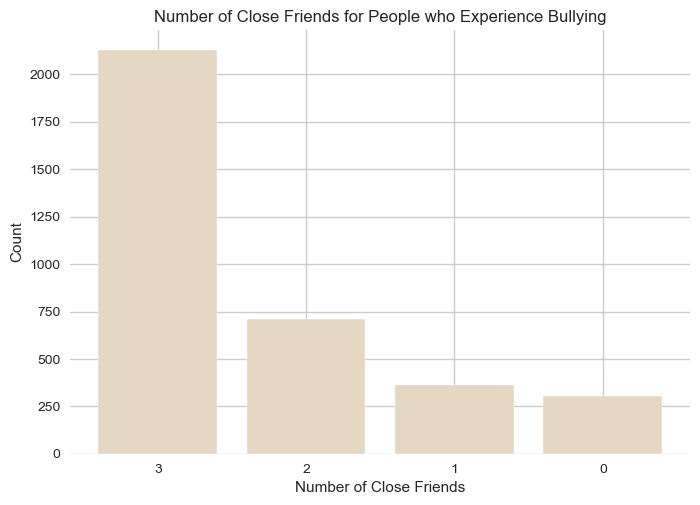

In [849]:
plt.bar(getbully_count_closefriend.index.get_level_values(0), getbully_count_closefriend)

# Set the title and axis labels
plt.title("Number of Close Friends for People who Experience Bullying")
plt.xlabel("Number of Close Friends")
plt.ylabel("Count")

# Show the plot
plt.show()

In [850]:
not_getbully_count_closefriend = df[(df['Bullied_on_school'] == 'No') & (df['Bullied_not_on_school'] == 'No') & (df['Cyber_bullied'] == 'No')][['Close_friends']].value_counts()
display(pd.DataFrame(not_getbully_count_closefriend,columns=[' people not get bullied ']))

,people not get bullied
Close_friends,
3,23574
2,4909
1,2427
0,1723


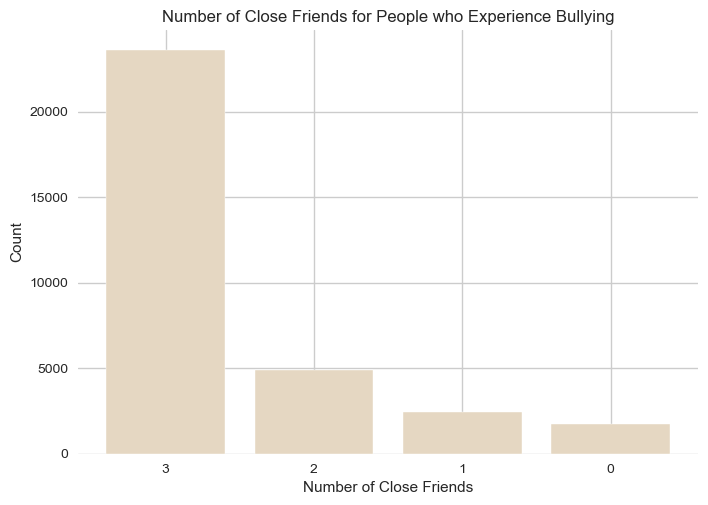

In [851]:
plt.bar(not_getbully_count_closefriend.index.get_level_values(0), not_getbully_count_closefriend)

# Set the title and axis labels
plt.title("Number of Close Friends for People who Experience Bullying")
plt.xlabel("Number of Close Friends")
plt.ylabel("Count")

# Show the plot
plt.show()

In [852]:
get_bully_have_closefriend = df[(df['Bullied_on_school'] == 'Yes')][['Close_friends']].value_counts()
display(pd.DataFrame(get_bully_have_closefriend ))

,0
Close_friends,
3,7460
2,2106
1,1203
0,900


In [853]:
get_bully_have_closefriend_ratio = df[(df['Bullied_on_school'] == 'Yes')][['Close_friends']].value_counts(normalize=True)
display(pd.DataFrame(get_bully_have_closefriend_ratio ))

,0
Close_friends,
3,0.639301
2,0.180478
1,0.103094
0,0.077127


In [854]:
not_get_bully_have_closefriend_ratio = df[(df['Bullied_on_school'] == 'No')][['Close_friends']].value_counts(normalize=True)
display(pd.DataFrame(not_get_bully_have_closefriend_ratio ))

,0
Close_friends,
3,0.709882
2,0.157947
1,0.078533
0,0.053638


In [855]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Define the sample sizes and successes for each group
n1 = sum(get_bully_have_closefriend.values)
x1 = np.array([get_bully_have_closefriend[0], get_bully_have_closefriend[1], get_bully_have_closefriend[2],get_bully_have_closefriend[3]])
n2 = sum(not_get_bully_have_closefriend_ratio.values)
x2 = np.array([not_get_bully_have_closefriend_ratio[0], not_get_bully_have_closefriend_ratio[1], not_get_bully_have_closefriend_ratio[2], not_get_bully_have_closefriend_ratio[3]])

# Perform the z-test for the difference in proportions
count = np.array([x1[3], x2[3]])  # number of successes in each group
nobs = np.array([n1, n2])  # sample sizes for each group
stat, pval = proportions_ztest(count, nobs)

# Print the results
print(f"Test statistic: {stat:.3f}")
print(f"P-value: {pval:.3f}")
if pval < 0.05:
    print("There is a significant difference in the proportion of Close_friends between the two groups.")
else:
    print("There is no significant difference in the proportion of Close_friends between the two groups.")


Test statistic: 0.088
P-value: 0.930
There is no significant difference in the proportion of Close_friends between the two groups.


In [856]:
filtered_df6 = df[(df['Bullied_not_on_school'] == 'Yes')][['Close_friends']].value_counts()
display(pd.DataFrame(filtered_df6 ))

,0
Close_friends,
3,7767
2,2215
1,1157
0,829


In [857]:
filtered_df6 = df[(df['Bullied_not_on_school'] == 'Yes')][['Close_friends']].value_counts(normalize=True)
display(pd.DataFrame(filtered_df6 ))

,0
Close_friends,
3,0.648981
2,0.185077
1,0.096674
0,0.069268


In [858]:
filtered_df66 = df[(df['Bullied_not_on_school'] == 'No')][['Close_friends']].value_counts(normalize=True)
display(pd.DataFrame(filtered_df66 ))

,0
Close_friends,
3,0.706301
2,0.156861
1,0.080578
0,0.056260


In [859]:
n1 = sum(filtered_df6.values)
x1 = np.array([filtered_df6[0], filtered_df6[1], filtered_df6[2], filtered_df6[3]])
n2 = sum(filtered_df66.values)
x2 = np.array([filtered_df66[0], filtered_df66[1], filtered_df66[2], filtered_df66[3]])

# Perform the z-test for the difference in proportions
count = np.array([x1[3], x2[3]])  # number of successes in each group
nobs = np.array([n1, n2])  # sample sizes for each group
stat, pval = proportions_ztest(count, nobs)

# Print the results
print(f"Test statistic: {stat:.3f}")
print(f"P-value: {pval:.3f}")
if pval < 0.05:
    print("There is a significant difference in the proportion of Close_friends between the two groups.")
else:
    print("There is no significant difference in the proportion of Close_friends between the two groups.")

Test statistic: 0.038
P-value: 0.970
There is no significant difference in the proportion of Close_friends between the two groups.


In [860]:
filtered_df7 = df[(df['Cyber_bullied'] == 'Yes')][['Close_friends']].value_counts()
display(pd.DataFrame(filtered_df7 ))

,0
Close_friends,
3,7640
2,2319
1,1182
0,809


In [861]:
filtered_df7 = df[(df['Cyber_bullied'] == 'Yes')][['Close_friends']].value_counts(normalize=True)
display(pd.DataFrame(filtered_df7 ))

,0
Close_friends,
3,0.639331
2,0.194059
1,0.098912
0,0.067699


In [862]:
filtered_df77 = df[(df['Cyber_bullied'] == 'No')][['Close_friends']].value_counts(normalize=True)
display(pd.DataFrame(filtered_df77))

,0
Close_friends,
3,0.709577
2,0.153876
1,0.079960
0,0.056586


In [863]:
n1 = sum(filtered_df7.values)
x1 = np.array([filtered_df7[0], filtered_df7[1], filtered_df7[2], filtered_df7[3]])
n2 = sum(filtered_df77.values)
x2 = np.array([filtered_df77[0], filtered_df77[1], filtered_df77[2], filtered_df77[3]])

# Perform the z-test for the difference in proportions
count = np.array([x1[3], x2[3]])  # number of successes in each group
nobs = np.array([n1, n2])  # sample sizes for each group
stat, pval = proportions_ztest(count, nobs)

# Print the results
print(f"Test statistic: {stat:.3f}")
print(f"P-value: {pval:.3f}")
if pval < 0.05:
    print("There is a significant difference in the proportion of Close_friends between the two groups.")
else:
    print("There is no significant difference in the proportion of Close_friends between the two groups.")

Test statistic: 0.033
P-value: 0.974
There is no significant difference in the proportion of Close_friends between the two groups.


Answer Q5

จากข้อมูลพบว่า เด็กที่มีเพื่อนน้อย ไม่ได้ส่งผลต่อการถูกกลั่นแกล้ง การที่เด็กมีเพื่่อนเยอะกลับถูกกลั่นแกล้งเยอะกว่า
จึงได้ทำการเทียบระหว่าง 2 กลุ่ม ระหว่างเด็กที่ถูกกลั่นแกล้ง กับเด็กที่ไม่ถูกกลั่นแกล้ง ว่าจำนวนเพื่อนสนิทที่มี ทำให้โดนกลั่นแกล้งแตกต่างกันแค่ไหน
หลังจากนั้นจึงพบว่าทั้งสองกลุ่ม ไม่ว่าจะมีเพื่อนกี่คนถ้าจะถูกเด็กกลั่นแกล้งก็ถูกเด็กกลั่นแกล้งอยู่ดี
